# Project 5                                                                                         

# Title: Ford GoBike System Data Exploration
## by Soumyadip Guha

</br>

<div id="intro", style="font-family:cursive">

## Preliminary Wrangling:

<p style="font-size:18px; font-weight:300">This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This is basically <a href="https://www.lyft.com/bikes/bay-wheels/system-data">Bay Wheel's Trip data</a>. This dataset will require some data wrangling in order to make it tidy for analysis. There are multiple cities covered by the linked system. For the analysis on full year coverage 2019 trip data fromJanuary to December is taken.</p>
<p style="font-size:18px; font-weight:300">
    <a href="https://en.wikipedia.org/wiki/Bay_Wheels">Bay Wheels</a>(previously known as Ford GoBike) is a regional public bicycle sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California.  The dataset used for this exploratory analysis consists of monthly trip data from January 2019 to December 2019 covering the greater San Francisco Bay area.</p>
</div>

</br>

In [1]:
# Import all the necessary python libraries for the exploration for plotting the visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
from zipfile import ZipFile
import glob

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


<div id="intro", style="font-family:cursive">

## Gather Data:

</div>

In [2]:
# Unzip all zip files downloaded from fordgobike site as system data for this analysis
# Unzip all the zip files stored in 'data' folder and after unzip we remove them from that folder
# The code of this cell is used to unzip the zip files programetically but do not need to run this cell again.

# folder='data'
# for item in os.listdir(folder):
#     with ZipFile(folder + '/' + item) as zfile:
#         zfile.extractall(folder)
#         zfile.close()
#         os.remove(folder + '/' + item)
        

In [3]:
# Check for the csv files those we extract from the zip files. csv files are stored in 'data' folder.
folder='data'
os.listdir(folder)


['201901-fordgobike-tripdata.csv',
 '201902-fordgobike-tripdata.csv',
 '201903-fordgobike-tripdata.csv',
 '201904-fordgobike-tripdata.csv',
 '201905-baywheels-tripdata.csv',
 '201906-baywheels-tripdata.csv',
 '201907-baywheels-tripdata.csv',
 '201908-baywheels-tripdata.csv',
 '201909-baywheels-tripdata.csv',
 '201910-baywheels-tripdata.csv',
 '201911-baywheels-tripdata.csv',
 '201912-baywheels-tripdata.csv']

In [4]:
# Create dataframes from those csv files and concat them into a single dataframe
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder, '*.csv'))]
trip_df = pd.concat(frames, ignore_index=True, sort=True);
trip_df.sample(10);


In [5]:
trip_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [6]:
# Save the data of the dataframe as a csv file
trip_df.to_csv('trip_19.csv')


In [7]:
# Create a copy of the dataframe for exploration and explanation.
df = trip_df.copy()


In [8]:
df.head()

bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
0     4861                      No         80825           196.0   
1     5506                      No         65900           134.0   
2     2717                      No         62633           157.0   
3     4557                      No         44680            53.0   
4     2100                      No         60709            28.0   

   end_station_latitude  end_station_longitude              end_station_name  \
0             37.808894            -122.256460       Grand Ave at Perkins St   
1             37.752428            -122.420628        Valencia St at 24th St   
2             37.846784            -122.291376          65th St at Hollis St   
3             37.775946            -122.437777        Grove St at Divisadero   
4             37.787168            -122.388098  The Embarcadero at Bryant St   

                   end_time rental_access_method  start_station_id  \
0  2019-02-01 16:24:49.8640                  NaN             229.0   
1  2019-02-01 15:16:54.1730                  NaN               4.0   
2  2019-02-01 11:30:46.5300                  NaN             245.0   
3  2019-02-01 08:10:50.3180                  NaN              85.0   
4  2019-02-01 07:10:51.0650                  NaN              16.0   

   start_station_latitude  start_station_longitude  \
0               37.775745              -122.213037   
1               37.785881              -122.408915   
2               37.870139              -122.268422   
3               37.770083              -122.429156   
4               37.794130              -122.394430   

            start_station_name                start_time   user_type  
0    Foothill Blvd at 42nd Ave  2019-01-31 17:57:44.6130  Subscriber  
1  Cyril Magnin St at Ellis St  2019-01-31 20:58:33.8860  Subscriber  
2       Downtown Berkeley BART  2019-01-31 18:06:52.9240    Customer  
3      Church St at Duboce Ave  2019-01-31 19:46:09.7190    Customer  
4      Steuart St at Market St  2019-01-31 14:19:01.5410    Customer

<div id="intro", style="font-family:cursive">

## Assess And Clean Data:

</div>

In [9]:
# Get summery about the dataframe
df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    2506983 non-null int64
bike_share_for_all_trip    2263724 non-null object
duration_sec               2506983 non-null int64
end_station_id             2424081 non-null float64
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null object
rental_access_method       120838 non-null object
start_station_id           2426249 non-null float64
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null object
user_type                  2506983 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [10]:
# Check the shape of dataframe
df.shape


(2506983, 15)

In [11]:
# Check the values of bike_share_for_all_trip column.
df.bike_share_for_all_trip.unique()


array(['No', 'Yes', nan], dtype=object)

In [12]:
# Check the values of bike_share_for_all_trip column.
df.rental_access_method.unique()


array([nan, 'app', 'clipper'], dtype=object)

<div id="intro", style="font-size:18px; font-family:cursive">

> - From the above summery we can see that there are several columns for those datatype have to be changed. And We have create some extra columns for the shake of easy exploration.

</div>

In [13]:
# Change type of bike_id, start_station_id, end_station_id from int to string.
df.bike_id = df.bike_id.astype('str')
df.start_station_id = df.start_station_id.astype('str')
df.end_station_id = df.end_station_id.astype('str')

# Chage type of start_time and end_time from object to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# Change type of rental_access_method, user_type and bike_share_for_all_trip columns to category.
df.rental_access_method = df.rental_access_method.astype('category')
df.user_type = df.user_type.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')


In [14]:
# Check the types of the dataframe columns.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    object
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       category
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(3), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 236.7+ MB


In [15]:
# Get sample of the dataframe.
df.sample(10)


bike_id bike_share_for_all_trip  duration_sec end_station_id  \
831812     4683                     Yes          3243          219.0   
2223614   10238                      No           253           30.0   
771346     2136                      No          1340            6.0   
2122052   12482                      No           263           91.0   
371710     5074                     Yes           490          340.0   
2008839   10966                      No           282           60.0   
1998770   10737                      No           375           42.0   
1854463    1590                      No           863          104.0   
2352209   11129                      No          2509           14.0   
1213737    1875                      No           509           27.0   

         end_station_latitude  end_station_longitude  \
831812              37.809824            -122.280192   
2223614             37.776598            -122.395282   
771346              37.804770            -122.403234   
2122052             37.771762            -122.398438   
371710              37.849735            -122.270582   
2008839             37.774520            -122.409449   
1998770             37.778650            -122.418230   
1854463             37.767045            -122.390833   
2352209             37.795001            -122.399970   
1213737             37.788059            -122.391865   

                                       end_station_name  \
831812                            Marston Campbell Park   
2223614  San Francisco Caltrain (Townsend St at 4th St)   
771346                    The Embarcadero at Sansome St   
2122052                             Berry St at King St   
371710                          Harmon St at Adeline St   
2008839                            8th St at Ringold St   
1998770   San Francisco City Hall (Polk St at Grove St)   
1854463                               4th St at 16th St   
2352209                           Clay St at Battery St   
1213737                         Beale St at Harrison St   

                       end_time rental_access_method start_station_id  \
831812  2019-04-04 19:06:05.168                  NaN            202.0   
2223614 2019-11-19 18:15:04.421                  NaN            350.0   
771346  2019-04-10 22:48:01.508                  NaN             66.0   
2122052 2019-10-07 12:23:53.195                  NaN            104.0   
371710  2019-02-01 13:21:13.628                  NaN            246.0   
2008839 2019-10-22 09:01:15.651                  NaN            101.0   
1998770 2019-10-23 09:28:24.795                  NaN            356.0   
1854463 2019-09-12 08:11:40.934                  NaN             22.0   
2352209 2019-11-01 12:04:27.605                  NaN             37.0   
1213737 2019-06-05 16:20:58.387                  NaN            364.0   

         start_station_latitude  start_station_longitude  \
831812                37.800754              -122.274894   
2223614               37.771431              -122.405787   
771346                37.778742              -122.392741   
2122052               37.767045              -122.390833   
371710                37.869060              -122.270556   
2008839               37.767079              -122.407359   
1998770               37.769188              -122.422285   
1854463               37.789756              -122.394643   
2352209               37.785377              -122.396906   
1213737               37.772000              -122.389970   

                  start_station_name              start_time   user_type  
831812       Washington St at 8th St 2019-04-04 18:12:01.975  Subscriber  
2223614         8th St at Brannan St 2019-11-19 18:10:51.302  Subscriber  
771346         3rd St at Townsend St 2019-04-10 22:25:40.745  Subscriber  
2122052            4th St at 16th St 2019-10-07 12:19:29.232  Subscriber  
371710         Berkeley Civic Center 2019-02-01 13:13:02.773  Subscriber  
2008839       15th St at Potrero 

<div id="intro", style="font-size:18px; font-family:cursive">

> - Now check for the columns' values and chage or modify if that is necessary. And create new columns for ease of exploration.

</div>

In [16]:
# Check how many trips atleast half an hour.
df.query('duration_sec >= 3600').count()


bike_id                    30558
bike_share_for_all_trip    27326
duration_sec               30558
end_station_id             30558
end_station_latitude       30558
end_station_longitude      30558
end_station_name           28756
end_time                   30558
rental_access_method        2036
start_station_id           30558
start_station_latitude     30558
start_station_longitude    30558
start_station_name         28994
start_time                 30558
user_type                  30558
dtype: int64

<div id="intro", style="font-size:18px; font-family:cursive">

> - We can see that there are comparetively less number of trips whose duration is more than 1 hour. So its better to convert all rides duration to minute instead of hour.

</div>

In [17]:
# Create a new column duration_minute with trip time in minute.
df['duration_minute'] = df['duration_sec'] / 60
df.duration_minute = df.duration_minute.round(3)


In [18]:
# Get the top 10 duration in hours.
df.duration_minute.nlargest(10)


2481276    15201.833
2385537     1437.167
1265667     1436.950
644460      1435.233
1741971     1435.233
1165301     1432.533
2190150     1432.250
1172938     1431.733
1749276     1428.367
510137      1427.933
Name: duration_minute, dtype: float64

<div id="intro", style="font-size:18px; font-family:cursive">

> - We can see that there is a outlier in duration_minute column that is 15201.833 minutes, that is too much with comparison to other values. So we have to remove the row that contain this value in duration_minute column.

</div>

In [19]:
df.duration_minute.nlargest(1).index[0]

2481276

In [20]:
# Drop that row
df.drop([2481276], inplace=True)

In [21]:
# Check that row is removed or not.
df.duration_minute.nlargest(3)


2385537    1437.167
1265667    1436.950
644460     1435.233
Name: duration_minute, dtype: float64

In [22]:
# Get start day, month, hour, weekday from the start_time column.
df['start_date'] = df['start_time'].dt.date
df['start_month'] = df['start_time'].dt.strftime('%B')
df['start_month_day'] = df['start_time'].dt.day.astype(int)
df['start_weekday'] = df['start_time'].dt.strftime('%A')
df['start_hour'] = df['start_time'].dt.strftime('%H').astype(int)
df['start_month_num'] = df['start_time'].dt.month.astype(int)


In [23]:
# Check the column status.
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506982 entries, 0 to 2506982
Data columns (total 22 columns):
bike_id                    object
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       category
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
duration_minute            float64
start_date                 object
start_month                object
start_month_day            int32
start_weekday              object
start_hour                 int32
start_month_num            int32
dtypes: category(3), datetime64[ns](2), float64(5), int32(3), int64(1), object(8)
memory usage: 361.0+ MB


In [24]:
# Check some rows of the dataframe
df.head()


bike_id bike_share_for_all_trip  duration_sec end_station_id  \
0    4861                      No         80825          196.0   
1    5506                      No         65900          134.0   
2    2717                      No         62633          157.0   
3    4557                      No         44680           53.0   
4    2100                      No         60709           28.0   

   end_station_latitude  end_station_longitude              end_station_name  \
0             37.808894            -122.256460       Grand Ave at Perkins St   
1             37.752428            -122.420628        Valencia St at 24th St   
2             37.846784            -122.291376          65th St at Hollis St   
3             37.775946            -122.437777        Grove St at Divisadero   
4             37.787168            -122.388098  The Embarcadero at Bryant St   

                 end_time rental_access_method start_station_id  ...  \
0 2019-02-01 16:24:49.864                  NaN            229.0  ...   
1 2019-02-01 15:16:54.173                  NaN              4.0  ...   
2 2019-02-01 11:30:46.530                  NaN            245.0  ...   
3 2019-02-01 08:10:50.318                  NaN             85.0  ...   
4 2019-02-01 07:10:51.065                  NaN             16.0  ...   

            start_station_name              start_time   user_type  \
0    Foothill Blvd at 42nd Ave 2019-01-31 17:57:44.613  Subscriber   
1  Cyril Magnin St at Ellis St 2019-01-31 20:58:33.886  Subscriber   
2       Downtown Berkeley BART 2019-01-31 18:06:52.924    Customer   
3      Church St at Duboce Ave 2019-01-31 19:46:09.719    Customer   
4      Steuart St at Market St 2019-01-31 14:19:01.541    Customer   

  duration_minute  start_date  start_month start_month_day start_weekday  \
0        1347.083  2019-01-31      January              31      Thursday   
1        1098.333  2019-01-31      January              31      Thursday   
2        1043.883  2019-01-31      January              31      Thursday   
3         744.667  2019-01-31      January              31      Thursday   
4        1011.817  2019-01-31      January              31      Thursday   

   start_hour start_month_num  
0          17               1  
1          20               1  
2          18               1  
3          19               1  
4          14               1  

[5 rows x 22 columns]

<div id="intro", style="font-size:18px; font-family:cursive">

> - Change datatype of newly created columns.

</div>

In [25]:
# Change datatype of start_month and start_weekday to category.
df.start_month = df.start_month.astype('category')
df.start_weekday = df.start_weekday.astype('category')


In [26]:
# Create a function to get the seasons according to the start time.
# Then create a new column `season`.
def season_of_year(date):
    
    if date in range(3,6):
        return 'Spring'
    if date in range(6,9):
        return 'Summer'
    if date in range(9,12):
        return 'Autumn'
    else:
        return 'Winter'

# Apply function to start_month_num column creating a new season column
df['season'] = df.start_month_num.map(season_of_year)


In [27]:
# Check the values of `season` column.
df.season.value_counts()


Spring    677573
Summer    660437
Autumn    643377
Winter    525595
Name: season, dtype: int64

<div id="intro", style="font-size:18px; font-family:cursive">

> - Drop not usefull columns - `bike_share_for_all_trip`, `duration_sec`, `end_station_id`, `start_station_id`, `end_station_latitude`, `end_station_longitude`, `start_station_latitude`, `start_station_longitude`.

</div>

In [28]:
# Drop the column those are not usefull for this analysis.
df.drop(['duration_sec', 'bike_share_for_all_trip', 'start_station_id',
               'start_station_latitude', 'start_station_longitude', 'end_station_id',
               'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)


In [29]:
# Check all the existing columns.
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506982 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                 object
end_station_name        object
end_time                datetime64[ns]
rental_access_method    category
start_station_name      object
start_time              datetime64[ns]
user_type               category
duration_minute         float64
start_date              object
start_month             category
start_month_day         int32
start_weekday           category
start_hour              int32
start_month_num         int32
season                  object
dtypes: category(4), datetime64[ns](2), float64(1), int32(3), object(5)
memory usage: 210.4+ MB


In [30]:
# Store the clean and ready for exploration data in a csv file.
df.to_csv('trip_clean_19.csv')


</br>

<div id="intro", style="font-size:18px; font-family:cursive">

### What is the structure of this dataset?

> The cleaned dataset contains the columns of interest for the analysis. This dataset consists of around 2.5M rows and 15 columns. We store this dataset to `trip_clean_19.csv` file for future analysis puprpose. This dataset contains the following features -
  - bike_id                 
  - end_station_name       
  - end_time               
  - rental_access_method    
  - start_station_name      
  - start_time          
  - user_type              
  - duration_minute          
  - start_month             
  - start_month_day         
  - start_weekday           
  - start_hour              
  - start_month_num         
  - season 
  - start_date


### What are the main features of interest in this dataset?

- **Distribution of rides through the week** - To see which prieod of week demand high of availablity of service.
- **Distribution of rides through the month** - See in which part of a month there is generally a high demand of this service.
- **Distribution of rides through seasons** - See seasonal change makes any impact on the demand.
- **What is the pick hours during the days** - Demand more availablity of the bi-cycle during those prieods.
- **Association** between **user_type and different features** for future promotions.
- **More/less popular stations** to improve logistic bike distributions and maybe eliminate or include one or more stations.

### What features in the dataset will help support investigation into the feature(s) of interest?

This dataset contains all the usefull informations those are there from before in the dataset or created sing the existing informations in the dataset. One can explore all interesting features using this dataset.

</div>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">
    
## Univariate Exploration:

> In this section, I investigate the trend of some variables in the data. Univariate exploration is necessary to determine the trend of the individual variables of the dataset you are working with. This initial study not only helps visualize trends, but allows determining outliers and points outside the norm.

</div>

In [79]:
# Here we set the values to the variables which will be used in the following analysis.
# Set base color for univariate exploration.
base_color = sb.color_palette()[0]

# Set the orders for categorical variables that will be used later.

month_order=['January','February','March','April','May','June','July','August','September','October','November','December']

season_order = ['Summer', 'Autumn', 'Winter', 'Spring']

day_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set ticks and tick_lable for start_hour.
hour_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
hour_ticks_labels = ["0am", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm",
                  "13pm", "14pm", "15pm", "16pm", "17pm", "18pm", "19pm", "20pm", "21pm", "22pm", "23pm"]

# Set the ticks and tick_lable for season.
season_ticks = [0,1,2,3]
season_ticks_label = ['Summer \n (Jun,Jul,Aug)', 'Autumn \n (Sep,Oct,Nov)', 
              'Winter \n (Dec,Jan,Feb)', 'Spring \n (Mar,Apr,May)']


<div id="intro", style="font-size:18px; font-family:cursive">

### How number of rides vary from month to month?
</div>

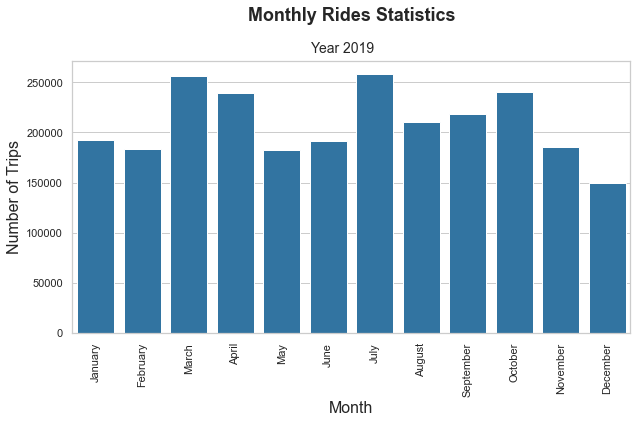

In [34]:
# See monthly statistics of trip demands.
sb.countplot(data=df, x='start_month', order=month_order, color=base_color);

# Set the size and background of the plot
sb.set(rc={'figure.figsize':(10,5)})
sb.set_style('whitegrid')

#for better visbility rotating the ticks by 90
plt.xticks(rotation=90)
plt.xlabel('Month', fontsize=16);
plt.ylabel('Number of Trips', fontsize=16);
plt.title('Monthly Rides Statistics\n', y=1.05, fontsize=18, fontweight='bold');
plt.suptitle('\nYear 2019\n', fontsize=14);


<div id="intro", style="font-size:18px; font-family:cursive">

> - We can see that during the month of 'December' demand is relatively low and in the month of 'July' demand is high.
- Generally there is up and down trends through out the years.
</div>

<div id="intro", style="font-size:18px; font-family:cursive">

### Is seasonal changes make impact on rides?
</div>

In [35]:
df.season.value_counts()

Spring    677573
Summer    660437
Autumn    643377
Winter    525595
Name: season, dtype: int64

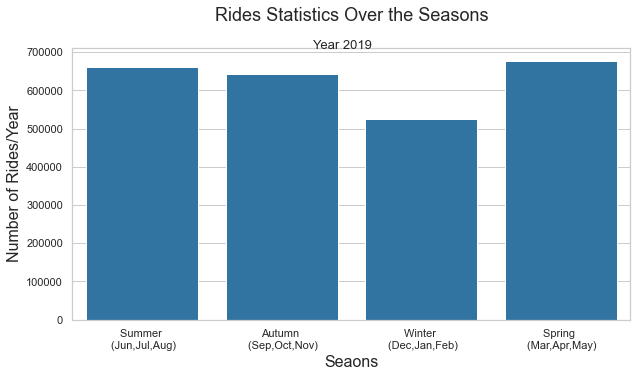

In [57]:
# See the statistics of rides in the seasons. See is seasons make impact the interest of riders to ride??
sb.countplot(data=df, x='season', order=season_order, color=base_color);

# Set the figure size and label the plot
sb.set(rc={'figure.figsize':(10,5)});
sb.set_style('whitegrid');
plt.title('Rides Statistics Over the Seasons\n', fontsize=18);
plt.suptitle('\n\nYear 2019\n', fontsize=13);
plt.xlabel('Seaons', fontsize=16);
plt.ylabel('Number of Rides/Year', fontsize=16);

plt.xticks(season_ticks, season_ticks_label);


<div id="intro", style="font-size:18px; font-family:cursive">

> - From the above plot we can see that 'Spring' is more cofortable for riders
- In the 'Winter' season riders less prefer to ride.
</div>

<div id="intro", style="font-size:18px; font-family:cursive">

### How rides vary through week?
Here we see how trip vary through the week. And also see proportions of contributionin rides of each day.
</div>

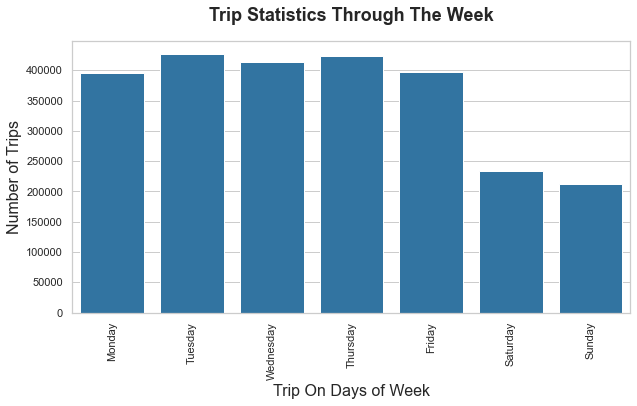

In [38]:
# Now see weekly report about the trip. Is this service during weekends less demanding??
sb.countplot(data=df, x='start_weekday', color=base_color, order=day_order);
plt.xlabel('Trip On Days of Week', fontsize=16);
plt.xticks(rotation=90);
plt.ylabel('Number of Trips', fontsize=16);
plt.title('Trip Statistics Through The Week', y=1.05, fontsize=18, fontweight='bold');


<div id="intro", style="font-size:18px; font-family:cursive">

> - We can see that during the weekends the demands decreases almost 50%. And Bay Wheel see least demand on Sunday of the Week.
</div>

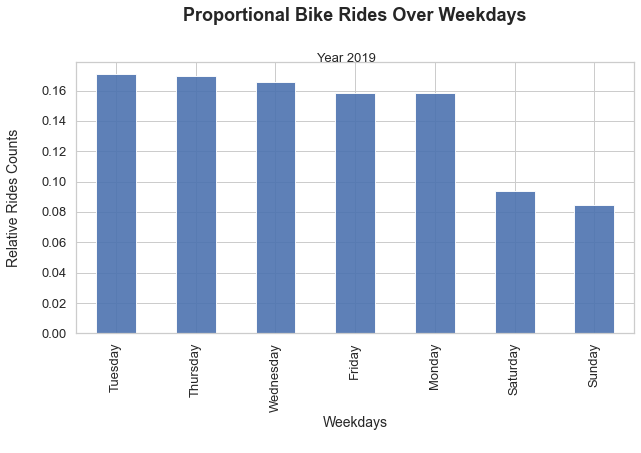

In [38]:
# Make a plot with relative frequency for weekly rides statistics.
# Get relative frequency
n_points = df.shape[0]
rel_fre = df.start_weekday.value_counts() / n_points

# Make the plot.
rel_fre.plot(kind='bar', fontsize=13, alpha=0.9);

# Label the plot.
plt.title('Proportional Bike Rides Over Weekdays\n', y=1.05, fontsize=18, fontweight='bold');
plt.suptitle('\n\nYear 2019\n', fontsize=13);
plt.xlabel('Weekdays\n', fontsize=14);
plt.ylabel('Relative Rides Counts\n', fontsize=14);


<div id="intro", style="font-size:18px; font-family:cursive">
    
From the above two plots we can observe-

> - Uuring the weekends the demands decreases almost 50%. And Bay Wheel see least demand on Sunday of the Week. On Tuesday bay Wheel see highest demands.
- Around 80% of bike rides happen during working days(from Monday to Friday) and only 20% on weekends(Satarday and Sunday).
</div>

<div id="intro", style="font-size:18px; font-family:cursive">

### In which part of the day most rides happen? What is the pick time?
</div>

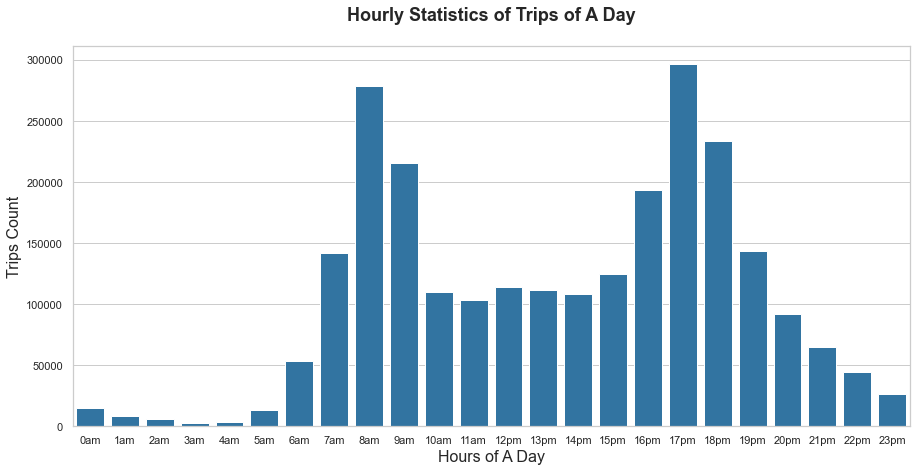

In [40]:
# See hourly statistics of rides.
sb.countplot(data=df, x='start_hour', color=base_color);
sb.set(rc={'figure.figsize':(15,7)})
sb.set_style('whitegrid')

plt.xlabel('Hours of A Day', fontsize=16);
plt.ylabel('Trips Count', fontsize=16);
plt.title('Hourly Statistics of Trips of A Day', y=1.05, fontsize=18, fontweight='bold');

# Set the ticks on x-axis.
plt.xticks(hour_ticks,hour_ticks_labels);


<div id="intro", style="font-size:18px; font-family:cursive">

> - We can see during First half of a day 8 A.M. is the rush hour and in the second half 5 P.M. is the rush hour.
</div>

In [41]:
# Create a new dataframe for pointplot.
hour_df = df.groupby('start_hour').agg({'bike_id':'count'}).reset_index()
hour_df['bike_id'] = (hour_df['bike_id']/hour_df['bike_id'].sum())*100


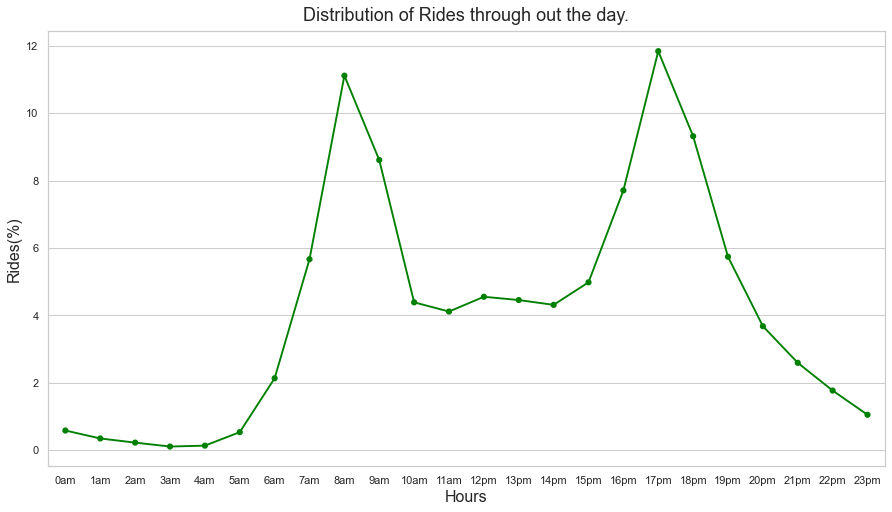

In [80]:
# Plot a pointplot for horly trip visualization.
plt.figure(figsize=(15,8))
sb.pointplot(data=hour_df, x='start_hour', y='bike_id', scale=.7, color='green');

plt.title('Distribution of Rides through out the day.', fontsize=18, y=1.01);
plt.xlabel('Hours', fontsize=16);
plt.ylabel('Rides(%)', fontsize=16);

plt.xticks(hour_ticks,hour_ticks_labels);


<div id="intro", style="font-size:18px; font-family:cursive">

From the above two plots we can observe that -
> - There are two rush hours 8A.M. and 5P.M.
- From starting of a day to 4A.M. we see less amount of rides. And most of rides around 85% happen from 7A.M. to 19P.M.
</div>

<div id="intro", style="font-size:18px; font-family:cursive">

### See Daily Rides Trends Through Out the Year 2019
</div>

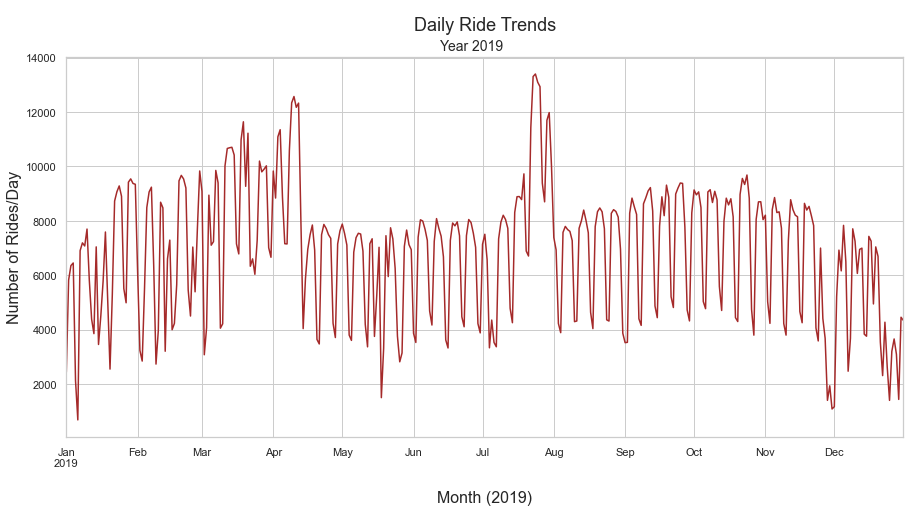

In [44]:
# get the daily ride trend.
df.start_date = pd.to_datetime(df.start_date, format='%Y-%m-%d %H:%M:%S.%f')

df.groupby('start_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(15,7), color='brown');
plt.title('Daily Ride Trends\n', fontsize=18);
plt.suptitle('\n\nYear 2019\n', fontsize=14);
plt.xlabel('\nMonth (2019)', fontsize=16);
plt.ylabel('Number of Rides/Day', fontsize=16);


<div id="intro", style="font-size:18px; font-family:cursive">

> - From the above plot we can say that daily trend has very high frequency and varies from month to month. Again we can see that every month has atleast four peaks of minimums and we can say that those are due to weekends.
- The trend differ from month to month and we can see that in April and July rides were popular.
</div>

<div id="intro", style="font-size:18px; font-family:cursive">

### What are the proportions Subscribers and Customers in rides?
</div>

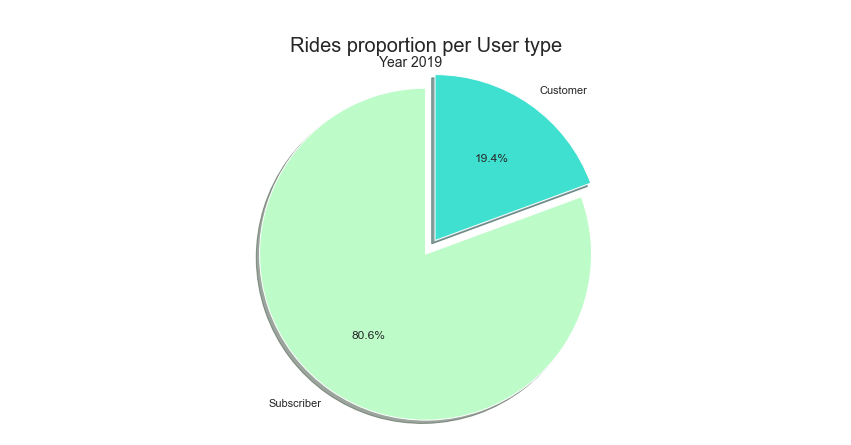

In [45]:
# Draw a pie chart for user_type visualization.
colors = ['#BDFCC9','#40E0D0','#00C5CD', '#B0E0E6', '#AEEEEE']

user_type = df.user_type.value_counts()
explode = (0, 0.1) 
plt.pie(user_type, explode=explode, labels=user_type.index, colors=colors, shadow=True, autopct='%1.1f%%', startangle=90);

plt.axis('equal'); # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Rides proportion per User type', fontsize=20);
plt.suptitle('\n\n\nYear 2019 \n',fontsize=14);


<div id="intro", style="font-size:18px; font-family:cursive">

From the above plot we can see that -

> - Most users of Bay Wheel are subscribers, it is around 80.6%
- Customer segment consists of only 19.4% of the rides.
</div>

<div id="intro", style="font-size:18px; font-family:cursive">

### What is the maximum trip duration? Which duration of trips happen more frequently?
</div>

In [47]:
df.duration_minute.max()


1437.167

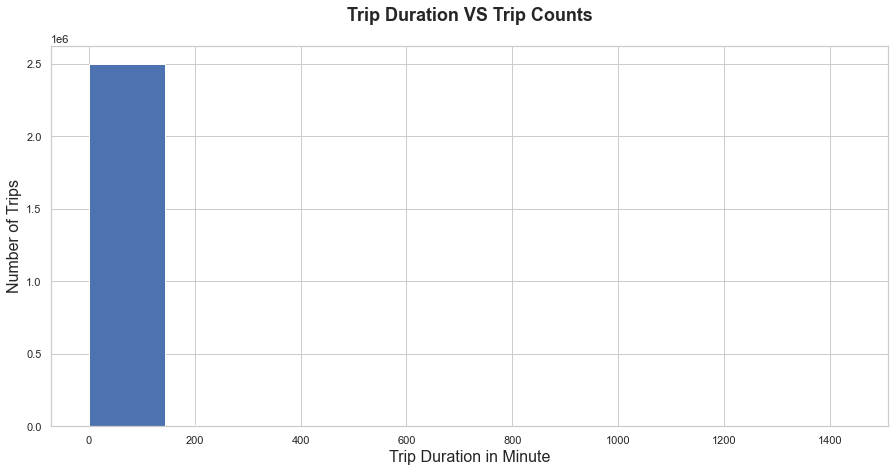

In [49]:
# Plot a histogram for duration_minute column.
plt.hist(data=df, x='duration_minute');
plt.xlabel('Trip Duration in Minute', fontsize=16);
plt.ylabel('Number of Trips', fontsize=16);
plt.title('Trip Duration VS Trip Counts', y=1.05, fontsize=18, fontweight='bold');


<div id="intro", style="font-size:18px; font-family:cursive">

> - we can see that most of the trips are less than 150 minutes.
</div>

In [50]:
# Check the range of duration_hour values.
df.duration_minute.describe(percentiles=[.99])


count    2.506982e+06
mean     1.345475e+01
std      3.148295e+01
min      1.000000e+00
50%      9.517000e+00
99%      6.876700e+01
max      1.437167e+03
Name: duration_minute, dtype: float64

<div id="intro", style="font-size:18px; font-family:cursive">

> - we can see that 99% values of trip duration are less than 70 minutes. So we create plot till 90 minutes.
</div>

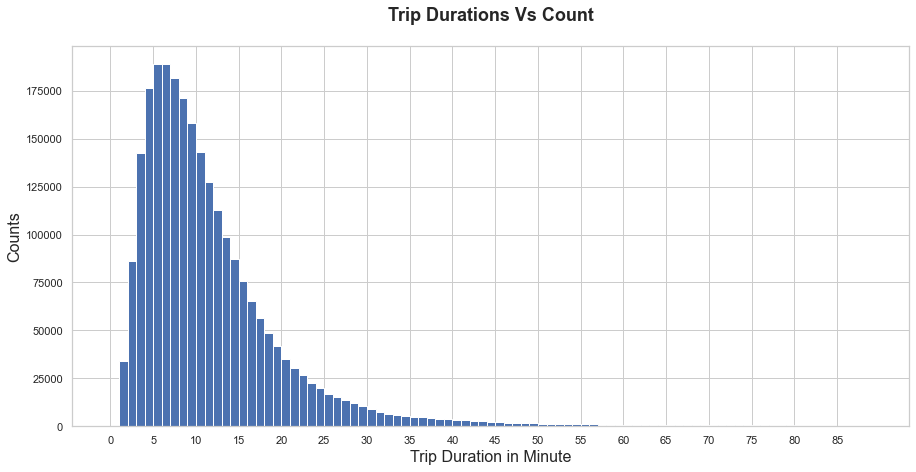

In [51]:
# Plot the histogram.
bins = np.arange(0, 90, 1)
ticks = np.arange(0, 90, 5)
plt.hist(data=df, x='duration_minute', bins=bins);
plt.xticks(ticks);
plt.xlabel('Trip Duration in Minute', fontsize=16);
plt.ylabel('Counts', fontsize=16);
plt.title('Trip Durations Vs Count', y=1.05, fontsize=18, fontweight='bold');


<div id="intro", style="font-size:18px; font-family:cursive">

From the above plots we observe -
> - Maximum duration of trip is 1437.167 minutes.
- we can see that 6 and 7 minutes ride durations take higher frequency.
</div>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">

### How many starting and ending stations are there? See rides statistics of those stations.
</div>

In [65]:
print('There are {} starting station.'.format(len(df.start_station_name.unique())))


There are 447 starting station.


In [67]:
print('There are {} ending station.'.format(len(df.end_station_name.unique())))


There are 447 ending station.


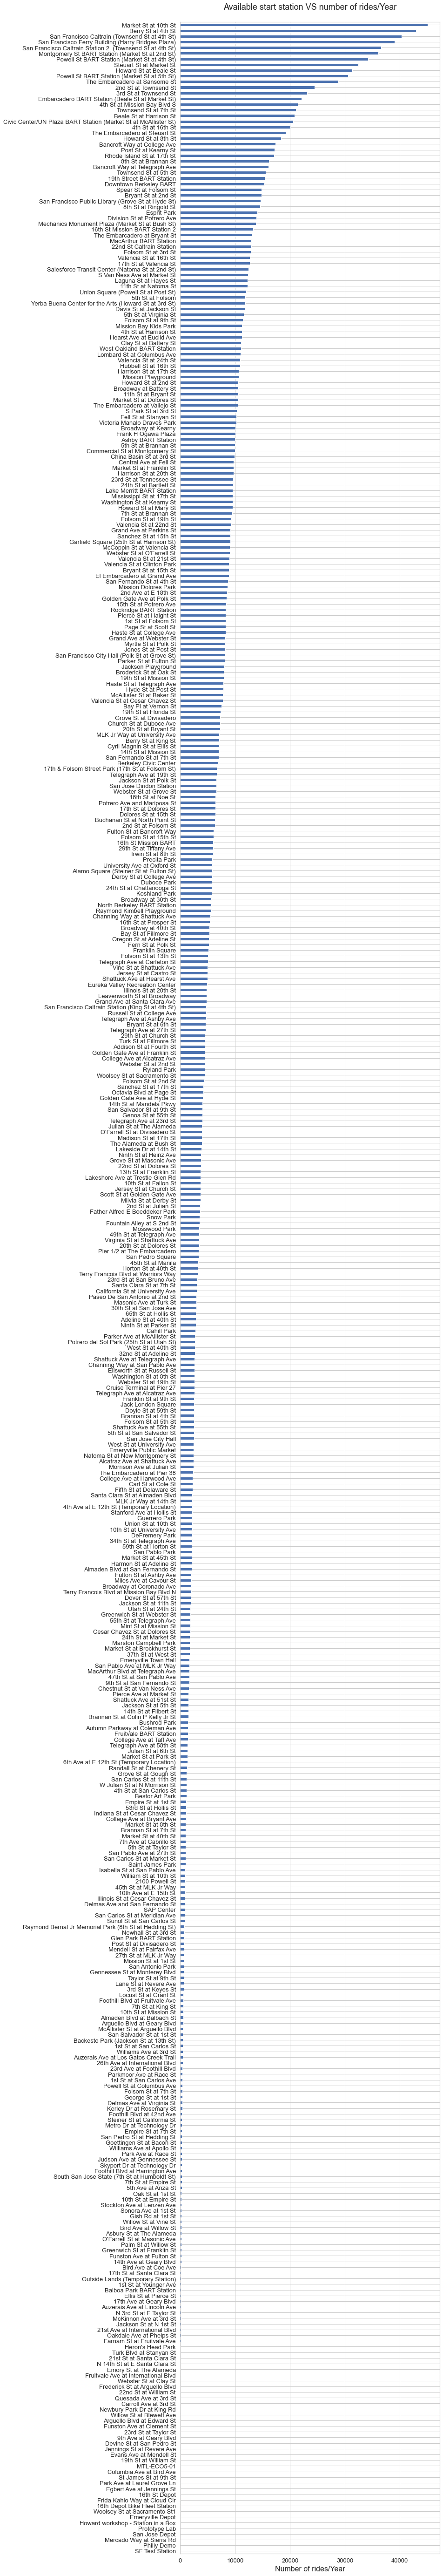

In [71]:
# See the statistics of start_station_name. How many stations are there of Bay Wheel.
df.start_station_name.value_counts().sort_values().plot(kind='barh', fontsize=13, figsize=(10,100));

plt.xlabel('Number of rides/Year', fontsize=16);
plt.ylabel('Start Station Name', fontsize=16).set_visible(False);
plt.title('Available start station VS number of rides/Year\n', fontsize=18);


<div id="intro", style="font-size:18px; font-family:cursive">

> - In the above plot we have 447 starting station and number of rides through those station per year.
</div>

</br>

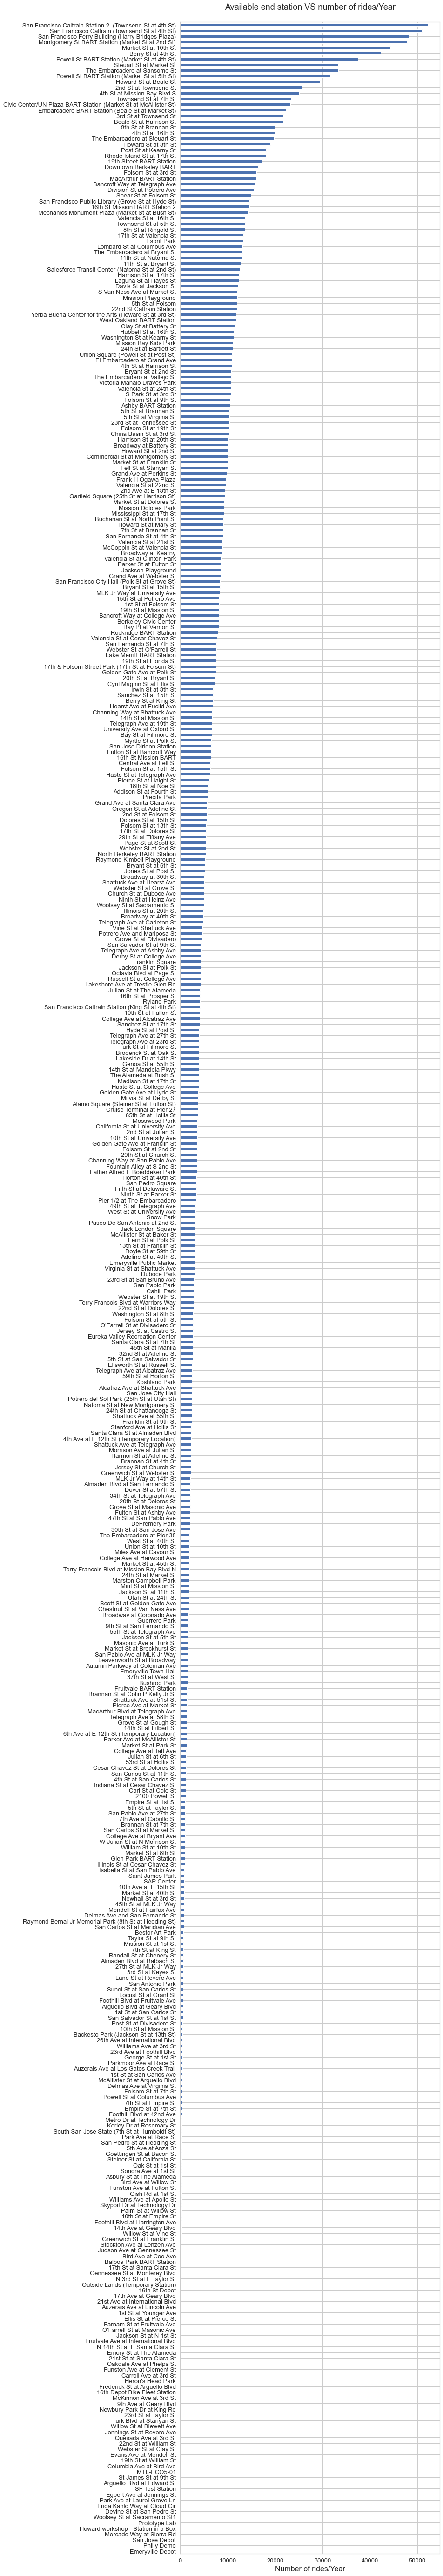

In [70]:
# See the statistics of start_station_name. How many stations are there of Bay Wheel.
df.end_station_name.value_counts().sort_values().plot(kind='barh', fontsize=13, figsize=(10,100));

plt.xlabel('Number of rides/Year', fontsize=16);
plt.ylabel('End Station Name', fontsize=16).set_visible(False);
plt.title('Available end station VS number of rides/Year\n', fontsize=18);


<div id="intro", style="font-size:18px; font-family:cursive">

> - In the above plot we have 447 ending station and number of rides through those station per year.
</div>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">
    
We observe that -
> - There are 447 starting stations and 447 ending stations available.
- There are some stations which have around 50K rides per year and there are also this kind of stations where we see only 5 rides in a year.
- We see that there are many starting and ending stations. So for policy and business improvement it will be better to look into the most and least popular stations.
</div>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">
    
### What are the more popular stations? And what are the least popular stations?
</div>

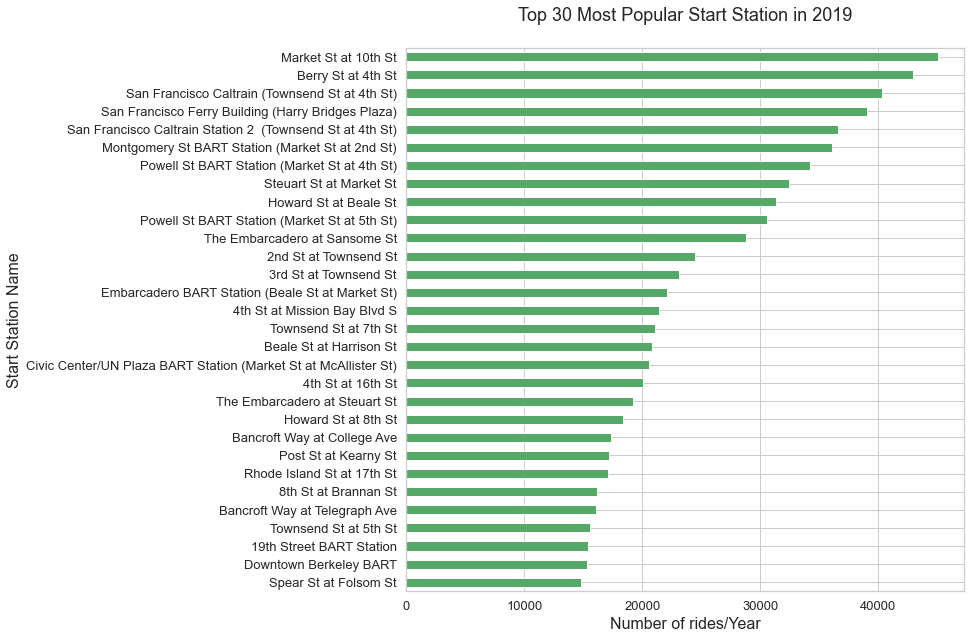

In [74]:
# Get the top 30 most popular start_station_name.
df.start_station_name.value_counts().head(30).sort_values().plot(kind='barh', fontsize=13, figsize=(10,10), color='g');

plt.xlabel('Number of rides/Year', fontsize=16);
plt.ylabel('Start Station Name', fontsize=16);
plt.title('Top 30 Most Popular Start Station in 2019\n', fontsize=18);


<div id="intro", style="font-size:18px; font-family:cursive">
    
> - We see that 'Market St at 10th St' is the most popular stations with around 46000 rides in the year 2019.
Top 3 most used starting stations are -
  1. Market St at 10th St
  - Berry St at 4th St
  - San Francisco Caltrain (Townsend St)
  
</div>

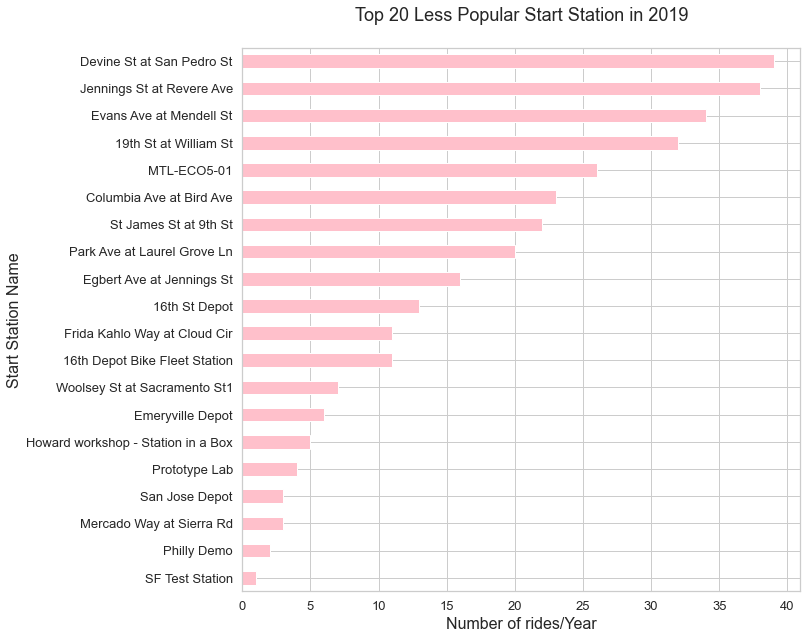

In [75]:
# Get the top 20 least popular start_station_name.
df.start_station_name.value_counts().sort_values().head(20).plot(kind='barh', fontsize=13, figsize=(10,10), color='pink');

plt.xlabel('Number of rides/Year', fontsize=16);
plt.ylabel('Start Station Name', fontsize=16);
plt.title('Top 20 Less Popular Start Station in 2019\n', fontsize=18);


<div id="intro", style="font-size:18px; font-family:cursive">
    
> - From the above plot we can see that there are 5 starting station with less than 5 rides in the year 2019!!!
Top 5 least used starting stations are -
  1. SF Test Station
  - Philly Demo
  - San Jose Depot
  - Mercado Way at Sierra Rd
  - Prototype Lab
</div>

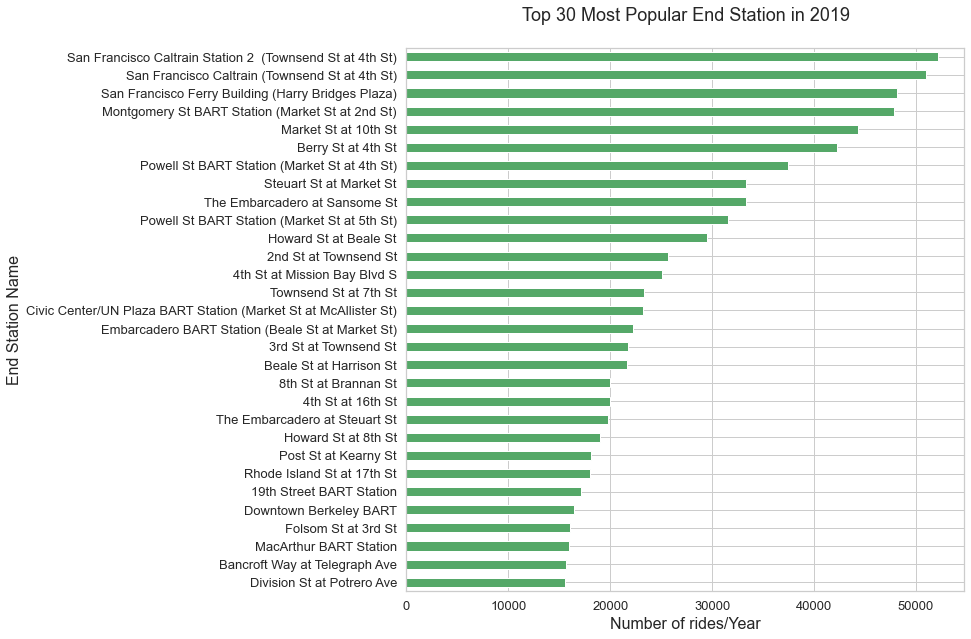

In [76]:
# Get the top 30 most popular end_station_name.
df.end_station_name.value_counts().head(30).sort_values().plot(kind='barh', fontsize=13, figsize=(10,10), color='g');

plt.xlabel('Number of rides/Year', fontsize=16);
plt.ylabel('End Station Name', fontsize=16);
plt.title('Top 30 Most Popular End Station in 2019\n', fontsize=18);


<div id="intro", style="font-size:18px; font-family:cursive">
    
> - From the above plot we can see that 'San Francisco Caltrain Staion 2' is the most popular ending station in 2019.
Top 3 most popuar destination stations are -
  1. San Francisco Caltrain Staion 2
  - San Francisco Caltrain
  - San Francisco Ferry Building

</div>

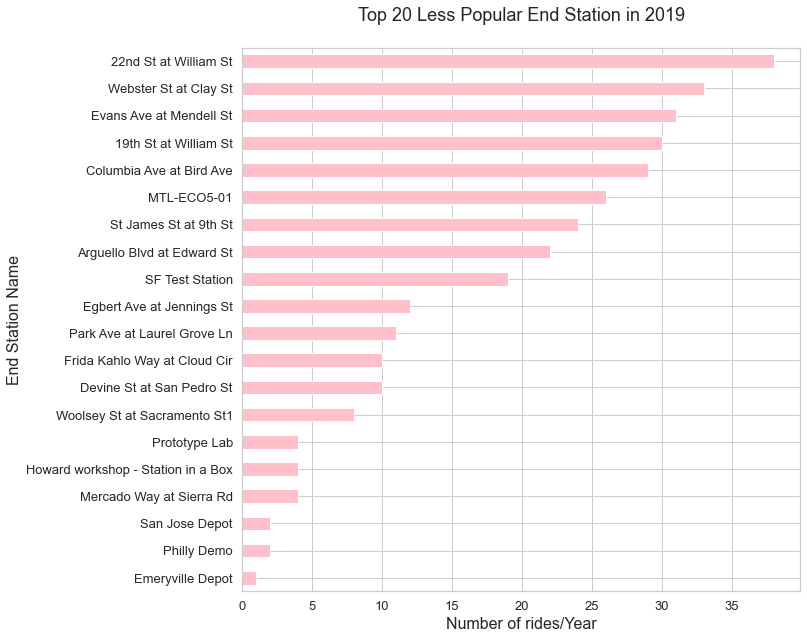

In [77]:
# Get the top 20 least popular end_station_name.
df.end_station_name.value_counts().sort_values().head(20).plot(kind='barh', fontsize=13, figsize=(10,10), color='pink');

plt.xlabel('Number of rides/Year', fontsize=16);
plt.ylabel('End Station Name', fontsize=16);
plt.title('Top 20 Less Popular End Station in 2019\n', fontsize=18);


<div id="intro", style="font-size:18px; font-family:cursive">
    
> - From the above plot we can see that there are 6 ending station with less than 5 rides in a year!!!
Five least popular ending stations are -
 1. Emeryville Depot
 - Philly Demo
 - San Jose Depot
 - Mercado Way at Sierra Rd
 - Prototype Lab
</div>

In [57]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506982 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                 2506982 non-null object
end_station_name        2424633 non-null object
end_time                2506982 non-null datetime64[ns]
rental_access_method    120837 non-null category
start_station_name      2426850 non-null object
start_time              2506982 non-null datetime64[ns]
user_type               2506982 non-null category
duration_minute         2506982 non-null float64
start_date              2506982 non-null datetime64[ns]
start_month             2506982 non-null category
start_month_day         2506982 non-null int32
start_weekday           2506982 non-null category
start_hour              2506982 non-null int32
start_month_num         2506982 non-null int32
season                  2506982 non-null object
dtypes: category(4), datetime64[ns](3), float64(1), int32(3), object(4)
memory usage: 210.4+ MB


</br>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">

### Observations
</div>

<div id="intro", style="font-size:18px; font-family:cursive">
    
Above we explore the variables of Bay Wheel's Trip dataset of the year 2019. After Univariate Exploration we can observe the followings -
 
  1. In the month 'July' we see high demand of Bay Wheel's service.
  2. 'Spring' time is most preferable for the riders and in 'Winter' riders less prefer to ride.
  3. During weekends we see less rides book and Tuesday see the high demand from the riders.
  4. There are two pick hours every day 8A.M. and 5P.M. We can say this is due to office time or work time.
  5. Around 80% clients of Bay Wheel are subscribers.
  6. There are 5 stations which riders choose as starting_station or ending_station less than 5 times in a year. These stations are -
      - Philly Demo
      - San Jose Depot
      - Mercado Way at Sierra Rd
      - Prototype Lab
      - Howard workshop
      
     So Bay Wheel can decide to exclude these stations from their business plan.
  
</div>

</br>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">

## Bivariate Exploration:

In this section we explore the relationships between pairs of variable in the dataset.
</div>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">

### How trip duration varies over the week?

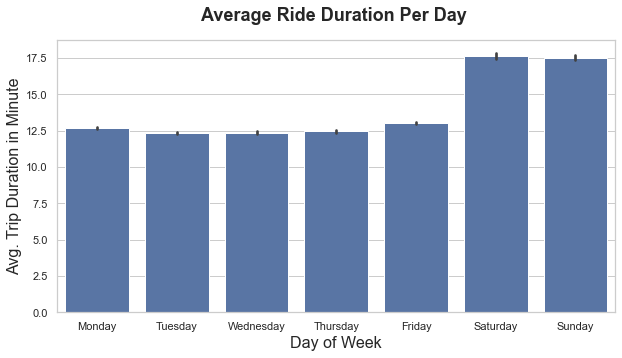

In [81]:
# Create a bar plot to see how ride duration varies with weekdays.
sb.barplot(data=df, x='start_weekday', y='duration_minute', color=base_color, order=day_order);

sb.set(style='whitegrid', rc={'figure.figsize':(10,5)});
plt.xlabel('Day of Week', fontsize=16);
plt.ylabel('Avg. Trip Duration in Minute', fontsize=16);
plt.title('Average Ride Duration Per Day ', y=1.05, fontsize=18, fontweight='bold');


<div id="intro", style="font-size:18px; font-family:cursive">

From the above plot we observe that -
> - Though people are less likely to ride on weekends(Satarday, Sunday), on weekends they are more likely to ride for long times. Reason may be they have more free times on the weekends.

<div id="intro", style="font-size:18px; font-family:cursive">

### Is average trip duration impacted by month?

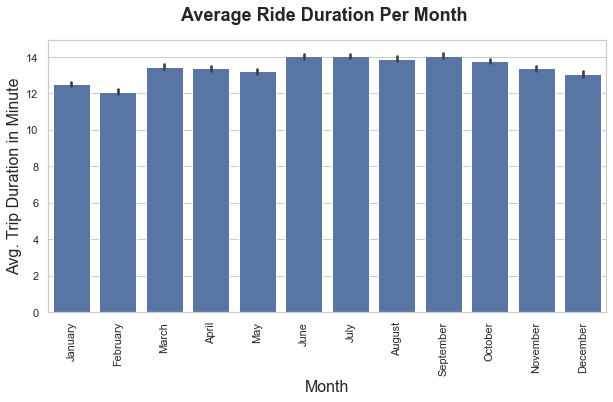

In [82]:
# See how the trip duration varies with month.
sb.barplot(data=df, x='start_month', y='duration_minute', color=base_color, order=month_order);
plt.xticks(rotation=90);
plt.xlabel('Month', fontsize=16);
plt.ylabel('Avg. Trip Duration in Minute', fontsize=16);
plt.title('Average Ride Duration Per Month ', y=1.05, fontsize=18, fontweight='bold');


<div id="intro", style="font-size:18px; font-family:cursive">

From the above plot we can see that -
> - Trip duration is not much impacted by month changes.
> - Average trip duration is pretty much same through the year, though in the month of 'February' we see less trip duration.
</div>

<div id="intro", style="font-size:18px; font-family:cursive">

### How rides duration is impacted by seasonal changes? Which season less comfortable for the riders?

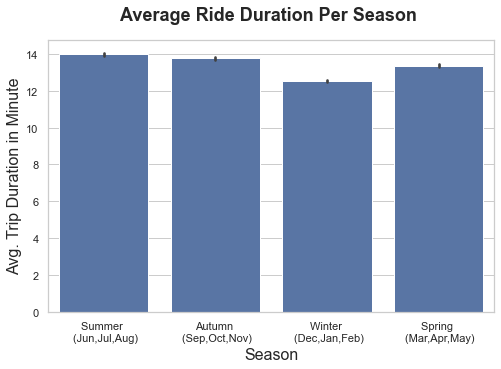

In [84]:
# See how the trip duration varies with season.
plt.figure(figsize=(8,5));
sb.barplot(data=df, x='season', y='duration_minute', color=base_color, order=season_order);
plt.xticks(season_ticks, season_ticks_label);
plt.xlabel('Season', fontsize=16);
plt.ylabel('Avg. Trip Duration in Minute', fontsize=16);
plt.title('Average Ride Duration Per Season ', y=1.05, fontsize=18, fontweight='bold');


<div id="intro", style="font-size:18px; font-family:cursive">

From the above plot we can see that -
> - Winter season is less comfortable for riders.
> - People in Summer rides for comperatively more times.
</div>

<div id="intro", style="font-size:18px; font-family:cursive">

### Is seasonal changes impact the rush hours?

In [115]:
# Creta a new dataframe for pointplot
season_df = df.groupby(['start_hour', 'season']).size().reset_index()
season_df

start_hour  season     0
0            0  Autumn  3952
1            0  Spring  3811
2            0  Summer  3825
3            0  Winter  3098
4            1  Autumn  2336
..         ...     ...   ...
91          22  Winter  9226
92          23  Autumn  7169
93          23  Spring  6947
94          23  Summer  6875
95          23  Winter  5401

[96 rows x 3 columns]

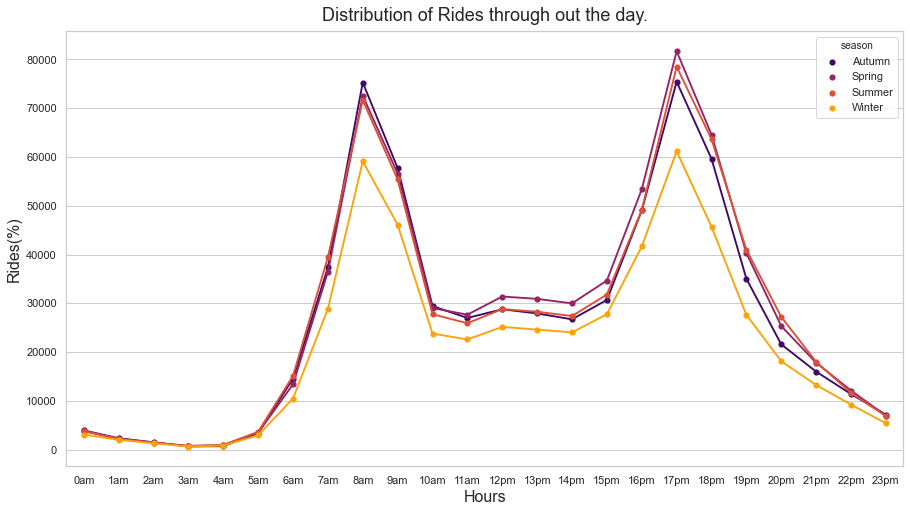

In [116]:
# Plot a pointplot for horly trip visualization.
plt.figure(figsize=(15,8))
sb.pointplot(data=season_df, x='start_hour', y=0,hue='season', scale=.7, palette=['#410967', '#932567', '#DC5039', '#FBA40A']);

plt.title('Distribution of Rides through out the day.', fontsize=18, y=1.01);
plt.xlabel('Hours', fontsize=16);
plt.ylabel('Rides(%)', fontsize=16);

plt.xticks(hour_ticks,hour_ticks_labels);


<div id="intro", style="font-size:18px; font-family:cursive">

From the above plot we can see that -
> - Seasonal changes affect the number of rides over the day, but it cant alter the pick hours.
</div>

<div id="intro", style="font-size:18px; font-family:cursive">

### How rides by different user types vary with months?

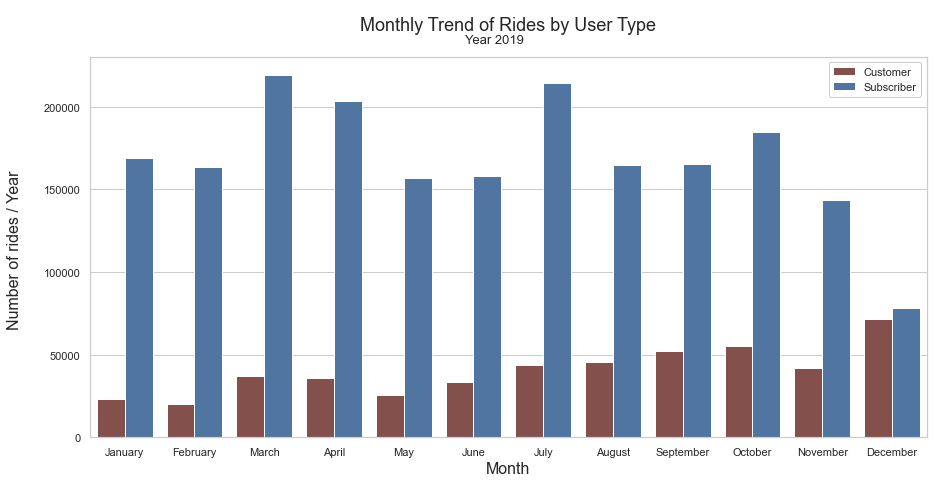

In [86]:
# See the trends of trip by user_type. See how trips are varied with user_type from month to month.
ax = sb.countplot(data=df, x='start_month', hue='user_type', order=month_order, palette=['#8C4843','#4274AD']);

# Set style and label the plot
sb.set(rc={'figure.figsize':(15,7)}, style='whitegrid');
plt.title('Monthly Trend of Rides by User Type\n', fontsize=18);
plt.suptitle('\n\nYear 2019\n',fontsize=13);
plt.xlabel('Month', fontsize=16);
plt.ylabel('Number of rides / Year \n',fontsize=16);
ax.legend(loc = 1, framealpha = 1); 


<div id="intro", style="font-size:18px; font-family:cursive">

> - We can see that there is no fixed trends of rides by subscribers over the year.
- Generally there is an upward trend for rides by customers from the month of 'May' to 'December'.
</div>

In [87]:
# Creta a new dataframe for pointplot
user_df = df.groupby(['start_month', 'user_type']).size().reset_index()


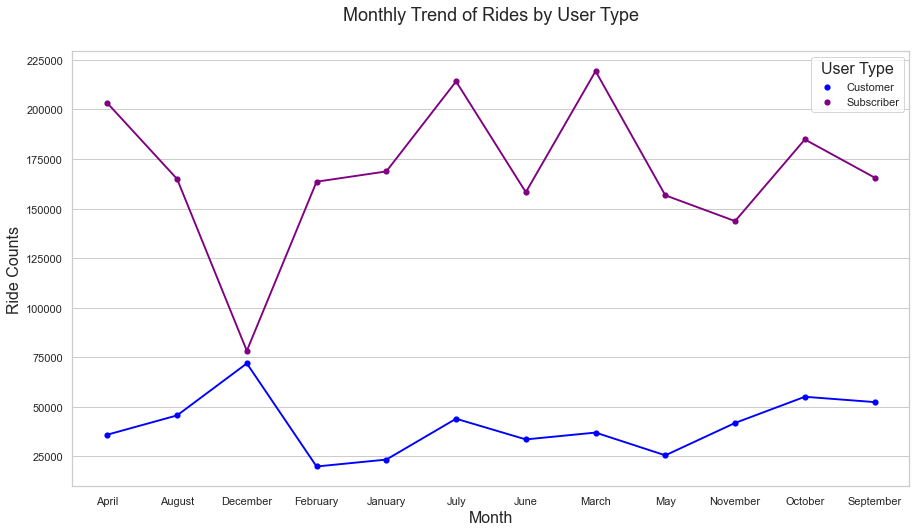

In [90]:
# Make a pointplot for the visualization of rides by user_type.
plt.figure(figsize=(15,8))
palette = {'Subscriber':'purple', 'Customer':'blue'}
ax = sb.pointplot(data=user_df, y=0, x='start_month', hue='user_type', palette=palette, scale=.7);

plt.title('Monthly Trend of Rides by User Type\n', fontsize=18, y=1.01);
plt.xlabel('Month', fontsize=16);
plt.ylabel('Ride Counts', fontsize=16);

leg = ax.legend();
leg.set_title('User Type',prop={'size':16});


<div id="intro", style="font-size:18px; font-family:cursive">

> - In the month of 'December' subscribers ride less and customers ride less in the month of 'February'.
</div>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">

From the above two plots we can see that -
> - There is no fixed trends for rides by users.
- In the month of 'December' we see less number of rides by the users.
- For customers there is generally an upward trends of ride from the month of 'May' to 'December'. We assume that popularity of Bay Wheel is growing among the customers.
</div>

<div id="intro", style="font-size:18px; font-family:cursive">

### How is the weekly ride trends by different user type?

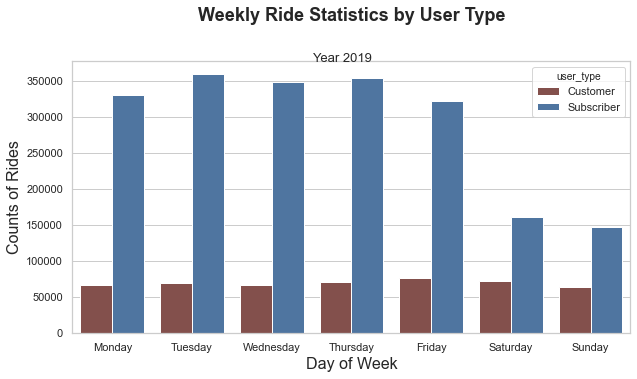

In [91]:
# See weekly rides trend by user_type.
fig=plt.figure(figsize=(10,5))
sb.countplot(data=df, x='start_weekday', hue='user_type',order=day_order, palette=['#8C4843','#4274AD']);

# Set the style and label the plot.
plt.xlabel('Day of Week', fontsize=16);
plt.ylabel('Counts of Rides', fontsize=16);
plt.title('Weekly Ride Statistics by User Type\n', y=1.05, fontsize=18, fontweight='bold');
plt.suptitle('\n\nYear 2019\n', fontsize=13);


<div id="intro", style="font-size:18px; font-family:cursive">
From the plot we can observe that -
    
> - Number of rides by subscribers is always greater than number of rides by customers.
- On weekends rides by subscribers is fall down to around 50%.
- Number of rides by customers is more or less same over the week.
</div>

<div id="intro", style="font-size:18px; font-family:cursive">

### What is the average ride duration by different user type?

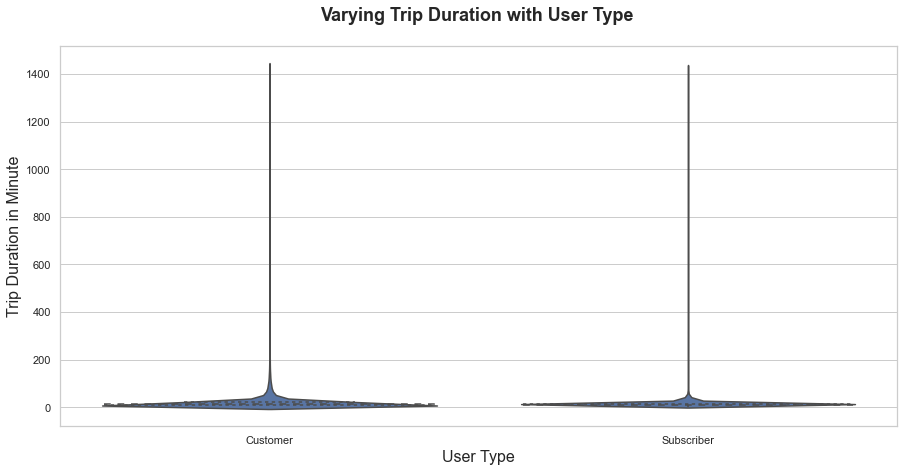

In [92]:
#plotting a volin plot for avg. trip duration by user_type.
sb.violinplot(data=df, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type', fontsize=16);
plt.ylabel('Trip Duration in Minute', fontsize=16);
plt.title('Varying Trip Duration with User Type ', y=1.05, fontsize=18, fontweight='bold');


<div id="intro", style="font-size:18px; font-family:cursive">

> - The above violine plot become like this because there are some large value in duration_minute column. Though we cant remove them as outliers as those are possible values. If the trip duration is 1200 minutes then it is 20 hours. It is possible that one go for a long trip or one hier bike and go somewhere and after some hours he returns back. So that kind of large can be removed as outliers.
</div>

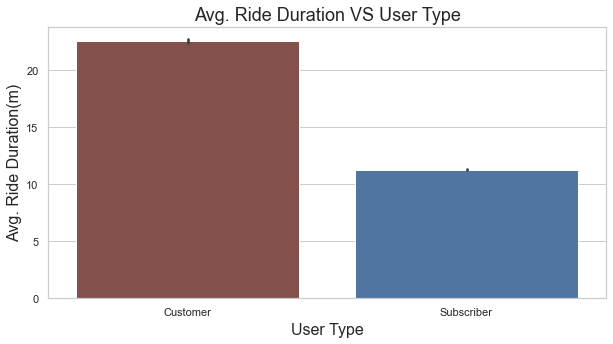

In [93]:
# See average ride duration by user_type. See which type users are more likely to ride more time.
plt.figure(figsize=(10,5))
sb.barplot(data=df, x='user_type', y='duration_minute', palette=['#8C4843','#4274AD']);

plt.xlabel('User Type', fontsize=16);
plt.ylabel('Avg. Ride Duration(m)', fontsize=16);
plt.title('Avg. Ride Duration VS User Type', fontsize=18);


<div id="intro", style="font-size:18px; font-family:cursive">
We observe that -

> - Average trip duration by Customers is almost 2 times the aaverage trip duration by Subscribers.
</div>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">

### Observations:
From the above bivariate exploration of the Bay Wheel's System dataset we find the following interesting features about the rides those are operated by Bay Wheel in Bay Area.
   1. Though customers books less number of rides as compared to subscribers, average trip duration of customers is greater than subscribers. Means customers book rides for comparetively long trip.
   2. Average trip durations on weekends are greater than working days of the week. So we say people have more free times on weekends as the reason of this facts.
   3. Number of trips booked by customers are more or less same through out the week.
   4. Average trip durations over the year almost same, though we see less average trip duration in the month of 'February'.
</div>

</br>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">

## Multivariate Exploration:

In this section we explore the relationships between three or more variables in the dataset. And do further exploration on the bivariate explorations.
</div>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">

### How number of rides differ with hours over the week? See the variation for both type of users indivisually?

</div>

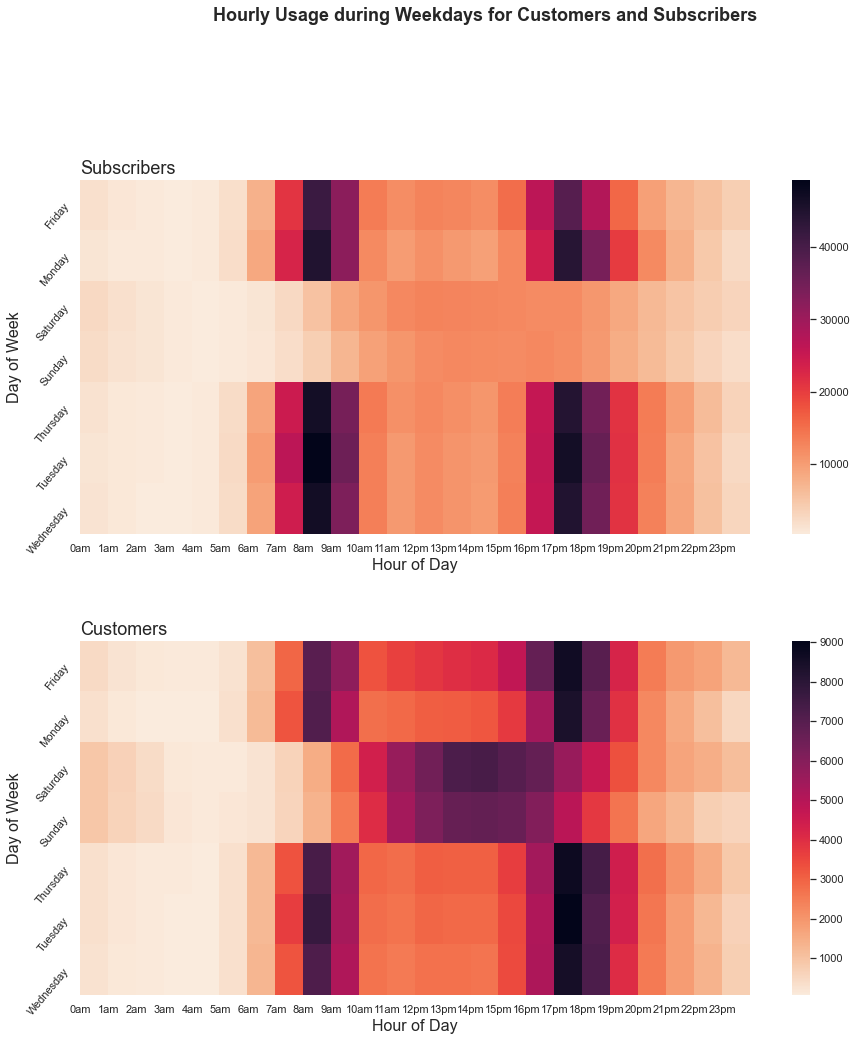

In [95]:
# Make heatmap plot for visualization.
fig=plt.figure(figsize=(15,15));
plt.suptitle("Hourly Usage during Weekdays for Customers and Subscribers",fontsize=18, y = 1.04,fontweight='bold');

#subplot1
plt.subplot(2, 1, 1);
plt.subplots_adjust(hspace = 0.3);

subscribers = df.query('user_type == "Subscriber"').groupby(['start_weekday', 'start_hour'])['bike_id'].size().reset_index(name='count')
subscribers = subscribers.pivot('start_weekday', 'start_hour', 'count')
ax = sb.heatmap(subscribers, cmap='rocket_r');

plt.title('Subscribers', fontsize=18, loc='left');
plt.xlabel('Hour of Day', fontsize=16);
plt.ylabel('Day of Week', fontsize=16);
plt.yticks(rotation=50);
plt.xticks(hour_ticks,hour_ticks_labels);


#subplot2
plt.subplot(2, 1, 2);

customers = df.query('user_type == "Customer"').groupby(['start_weekday', 'start_hour'])['bike_id'].size().reset_index(name='count')
customers = customers.pivot('start_weekday', 'start_hour', 'count')
ax = sb.heatmap(customers, cmap='rocket_r');

plt.title('Customers', fontsize=18, loc='left');
plt.xlabel('Hour of Day', fontsize=16);
plt.ylabel('Day of Week', fontsize=16);
plt.yticks(rotation=50);
plt.xticks(hour_ticks,hour_ticks_labels);


<div id="intro", style="font-size:18px; font-family:cursive">
    
From the above heatmap we observe -
> - For subscribers peak hours are between 8A.M. to 5P.M. during working days i.e. from Monday to Friday. And on weekends the number of rides fall down.
- For customers, on working days peak hours are the same as of subscribers, but on thw weekends they more likely to rides than subscribers.
</div>

<div id="intro", style="font-size:18px; font-family:cursive">

### How average trip duration by different user types vary over the week?

</div>

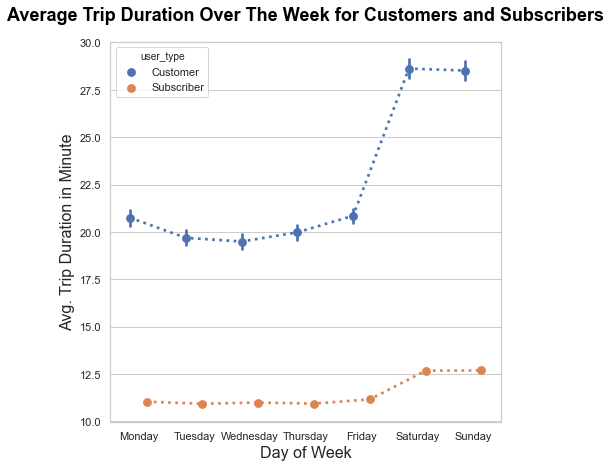

In [97]:
# Make a plot to visualize the relationships between the three variables.
fig=plt.figure(figsize=(7,7))
sb.pointplot(data=df, x='start_weekday', y='duration_minute', hue='user_type', dodge=0.3, linestyles=":",order=day_order);

plt.title("Average Trip Duration Over The Week for Customers and Subscribers", fontsize=18,
          y = 1.04, fontweight='bold', color = 'black')
plt.xlabel('Day of Week', fontsize=16);
plt.ylabel('Avg. Trip Duration in Minute', fontsize=16);


<div id="intro", style="font-size:18px; font-family:cursive">

>- Though on weekends subscribers ride less, the subscribers who ride on weekends ride for comparetively log time. And Average ride time for customers is always greater than that of subscribers.

</div>

</br>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">

### Observations

From the above multivariate exploration we can see some interesting features of the dataset. The features are following -
   1. Customers are always to ride for more times than subscribers.
   2. Subscribers are more likely to ride for more times on weekends.
</div>

</br>

</br>

<div id="intro", style="font-size:18px; font-family:cursive">

### Conclusions:
Here we explore Bay Wheel's System dataset. This organisation operates ride service in the California Bay Area. Here we analyse Bay Wheel's 2019 trip dataset that consists of around 2.5M rides details. We find some interesting facts about the dataset. We see during working days demands more their ride services than weeends. 80% of their rides booked on working days and 20% on weekends. Their services being popular among the customer users. Spring time is the most comfortable season to riders to ride. On Tuesday of the week Bay Wheel see high demands through out the week. Two peak hours are 8A.M. and 5P.M. we assume that this is due to working time or office time.

</br>